In [1]:
import numpy as np
import pandas as pd
import warnings
import plotly
import plotly.express as px

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)


In [2]:
# Read data from tidy tuesday repo
# post_offices = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-13/post_offices.csv')
# post_offices

post_offices = pd.read_csv("post_offices.csv")
post_offices

name         alt_name         orig_name state    county1  \
0        A AND M COLLEGE              NaN   A AND M COLLEGE    MS  OKTIBBEHA   
1               A. B. C.              NaN          A. B. C.    TN     SUMNER   
2                  AARON              NaN             AARON    MO      BATES   
3                  AARON              NaN             AARON    TN     BENTON   
4                  AARON              NaN             AARON    TN    BRADLEY   
...                  ...              ...               ...   ...        ...   
166135              TRUE              NaN              TRUE    OK     HARMON   
166136              TRUE              NaN              TRUE    TX      YOUNG   
166137     SIERRA BLANCA              NaN     SIERRA BLANCA    TX   HUDSPETH   
166138    GRAHAM'S MILLS    GRAHAMS MILLS    GRAHAM'S MILLS    TX     SHELBY   
166139  CATLETT'S  CREEK  CATLETTS  CREEK  CATLETT'S  CREEK    TX       WISE   

        county2  county3 orig_county  established  discontinued  continuous  \
0           NaN      NaN   Oktibbeha       1922.0        1932.0        True   
1           NaN      NaN      Sumner       1880.0        1914.0        True   
2           NaN      NaN       Bates       1895.0        1933.0        True   
3           NaN      NaN      Benton       1889.0        1890.0        True   
4           NaN      NaN     Bradley       1860.0        1860.0        True   
...         ...      ...         ...          ...           ...         ...   
166135      NaN      NaN      Harmon       1901.0        1905.0        True   
166136      NaN      NaN       Young       1894.0        1912.0        True   
166137      NaN      NaN    Hudspeth       1882.0           NaN        True   
166138      NaN      NaN      Shelby       1854.0           NaN        True   
166139      NaN      NaN        Wise       1858.0        1867.0        True   

        stamp_index      id  coordinates  duration  gnis_match      gnis_name  \
0               1.0       2        False      10.0       False            NaN   
1               4.0       3        False      34.0       False            NaN   
2               2.0       4         True      38.0        True          AARON   
3               5.0       5        False       1.0       False            NaN   
4               9.0       6        False       0.0       False            NaN   
...             ...     ...          ...       ...         ...            ...   
166135          6.0  166141        False       4.0       False            NaN   
166136          4.0  166142         True      18.0        True           TRUE   
166137          0.0  166143         True       NaN        True  SIERRA BLANCA   
166138          0.0  166144        False       NaN       False            NaN   
166139          7.0  166145        False       9.0       False            NaN   

       gnis_county gnis_state  gnis_feature_id gnis_feature_class  \
0              NaN        NaN              NaN                NaN   
1              NaN        NaN              NaN                NaN   
2            BATES         MO        2091668.0        Post Office   
3              NaN        NaN              NaN                NaN   
4              NaN        NaN              NaN                NaN   
...            ...        ...              ...                ...   
166135         NaN        NaN              NaN                NaN   
166136       YOUNG         TX        1380679.0    Populated Place   
166137    HUDSPETH         TX        2732001.0        Post Office   
166138         NaN        NaN              NaN                NaN   
166139         NaN        NaN              NaN                NaN   

                        gnis_orig_name gnis_orig_county  gnis_latitude  \
0                                  NaN              NaN            NaN   
1                                  NaN              NaN            NaN   
2       Aaron Post Office (historical)            Bates      38.422222   
3           

### Investigating uniqueness of data

In [3]:
# equivalent of add_count() in R
post_cols  = ['name', 'orig_name', 'state', 'county1']
office_count = post_offices.groupby(post_cols).agg(count=("name", "count"))
office_count = office_count[office_count['count']>=2]
office_count = office_count.merge(post_offices, left_on=post_cols , right_on=post_cols)
office_count = office_count.sort_values(post_cols, ascending=True).reset_index()
office_count 

index      name orig_name state         county1  count alt_name  county2  \
0        0  ACKERSON  ACKERSON    MI         JACKSON      2      NaN      NaN   
1        1  ACKERSON  ACKERSON    MI         JACKSON      2      NaN      NaN   
2        2      ACME      ACME    MI  GRAND TRAVERSE      2      NaN      NaN   
3        3      ACME      ACME    MI  GRAND TRAVERSE      2      NaN      NaN   
4        4    AINGER    AINGER    MI           EATON      2      NaN      NaN   
..     ...       ...       ...   ...             ...    ...      ...      ...   
666    666     YAMPA     YAMPA    CO           ROUTT      2      NaN      NaN   
667    667       YEW       YEW    MI           WAYNE      2      NaN      NaN   
668    668       YEW       YEW    MI           WAYNE      2      NaN      NaN   
669    669      YUBA      YUBA    OK           BRYAN      2      NaN      NaN   
670    670      YUBA      YUBA    OK           BRYAN      2      NaN      NaN   

     county3     orig_county  established  discontinued  continuous  \
0        NaN         Jackson       1898.0        1899.0        True   
1        NaN         Jackson       1899.0        1902.0        True   
2        NaN  Grand Traverse       1869.0        1933.0        True   
3        NaN  Grand Traverse       1952.0           NaN        True   
4        NaN           Eaton       1882.0        1889.0        True   
..       ...             ...          ...           ...         ...   
666      NaN           Routt       1894.0           NaN        True   
667      NaN           Wayne       1866.0        1877.0       False   
668      NaN           Wayne       1891.0        1902.0        True   
669      NaN           Bryan       1898.0        1932.0        True   
670      NaN           Bryan       1950.0        1971.0        True   

     stamp_index      id  coordinates  duration  gnis_match gnis_name  \
0            8.0   64426         True       1.0        True  ACKERSON   
1            7.0   64427         True       3.0        True  ACKERSON   
2            2.0   64437         True      64.0        True      ACME   
3            0.0   64438         True       NaN        True      ACME   
4            6.0   64698         True       7.0        True    AINGER   
..           ...     ...          ...       ...         ...       ...   
666          0.0  165813         True       NaN        True     YAMPA   
667          6.0  123513        False      11.0       False       NaN   
668          6.0  123514        False      11.0       False       NaN   
669          2.0  165986         True      34.0        True      YUBA   
670          1.0  165987         True      21.0        True      YUBA   

        gnis_county gnis_state  gnis_feature_id gnis_feature_class  \
0           JACKSON         MI        2633087.0        Post Office   
1           JACKSON         MI        2633087.0        Post Office   
2    GRAND TRAVERSE         MI        2496175.0        Post Office   
3    GRAND TRAVERSE         MI        2496175.0        Post Office   
4             EATON         MI        2574840.0        Post Office   
..              ...        ...              ...                ...   
666           ROUTT         CO        2736006.0        Post Office   
667             NaN        NaN              NaN                NaN   
668             NaN        NaN              NaN                NaN   
669           BRYAN         OK        1101750.0    Populated Place   
670           BRYAN         OK        1101750.0    Populated Place   

                        gnis_orig_name gnis_orig_county  gnis_latitude  \
0    Ackerson Post Office (historical)          Jackson      42.180556   
1    Ackerson Post Office (historical)          Jackson      42.180556   
2                     Acme Post Office   Grand Traverse      44.764644   
3                     Acme Post Office   Grand Traverse      44.764644   
4      Ainger Post Office (historical)            Eaton      42.482778   
..               

In [4]:
post_offices.columns

Index(['name', 'alt_name', 'orig_name', 'state', 'county1', 'county2',
       'county3', 'orig_county', 'established', 'discontinued', 'continuous',
       'stamp_index', 'id', 'coordinates', 'duration', 'gnis_match',
       'gnis_name', 'gnis_county', 'gnis_state', 'gnis_feature_id',
       'gnis_feature_class', 'gnis_orig_name', 'gnis_orig_county',
       'gnis_latitude', 'gnis_longitude', 'gnis_elev_in_m', 'gnis_dist',
       'latitude', 'longitude'],
      dtype='object')

### Limit dataset to certain variables 

In [5]:
post_offices = post_offices[['name', 'state', 'county1',
       'established', 'discontinued', 'continuous',
       'stamp_index', 'id', 'coordinates','latitude', 'longitude',
       'gnis_county', 'gnis_state', 
       'gnis_dist']]

post_offices =  post_offices[post_offices['established'] >= 1639]
post_offices = post_offices[(post_offices['discontinued'].isnull()) | (post_offices['discontinued'] >= 1639)]
post_offices

name state    county1  established  discontinued  \
0        A AND M COLLEGE    MS  OKTIBBEHA       1922.0        1932.0   
1               A. B. C.    TN     SUMNER       1880.0        1914.0   
2                  AARON    MO      BATES       1895.0        1933.0   
3                  AARON    TN     BENTON       1889.0        1890.0   
4                  AARON    TN    BRADLEY       1860.0        1860.0   
...                  ...   ...        ...          ...           ...   
166135              TRUE    OK     HARMON       1901.0        1905.0   
166136              TRUE    TX      YOUNG       1894.0        1912.0   
166137     SIERRA BLANCA    TX   HUDSPETH       1882.0           NaN   
166138    GRAHAM'S MILLS    TX     SHELBY       1854.0           NaN   
166139  CATLETT'S  CREEK    TX       WISE       1858.0        1867.0   

        continuous  stamp_index      id  coordinates   latitude   longitude  \
0             True          1.0       2        False        NaN         NaN   
1             True          4.0       3        False        NaN         NaN   
2             True          2.0       4         True  38.422222  -94.154167   
3             True          5.0       5        False        NaN         NaN   
4             True          9.0       6        False        NaN         NaN   
...            ...          ...     ...          ...        ...         ...   
166135        True          6.0  166141        False        NaN         NaN   
166136        True          4.0  166142         True  33.279830  -98.728670   
166137        True          0.0  166143         True  31.175930 -105.360000   
166138        True          0.0  166144        False        NaN         NaN   
166139        True          7.0  166145        False        NaN         NaN   

       gnis_county gnis_state  gnis_dist  
0              NaN        NaN        NaN  
1              NaN        NaN        NaN  
2            BATES         MO        1.0  
3              NaN        NaN        NaN  
4              NaN        NaN        NaN  
...            ...        ...        ...  
166135         NaN        NaN        NaN  
166136       YOUNG         TX        1.0  
166137    HUDSPETH         TX        1.0  
166138         NaN        NaN        NaN  
166139         NaN        NaN        NaN  

[166078 rows x 14 columns]

### Create one row for every year

In [6]:
post_office_years = post_offices[['name', 'state',
                                   'established', 'discontinued',
                                  'latitude', 'longitude']]
post_office_years['discontinued'] = post_office_years['discontinued'].fillna(2003)
post_office_years = post_office_years[(post_office_years['established'] >= 1750) & 
                                      (post_office_years['discontinued']<=2021)]
post_office_years['established']  = post_office_years['established'].astype(int)
post_office_years['discontinued'] = post_office_years['discontinued'].astype(int)

# mutate(year = map2(established, discontinued, seq)) in R can be written in python as follow
post_office_years['year'] = post_office_years.apply(lambda x : np.arange(x['established'],x['discontinued']+1),1)
post_office_years

name state  established  discontinued   latitude  \
0        A AND M COLLEGE    MS         1922          1932        NaN   
1               A. B. C.    TN         1880          1914        NaN   
2                  AARON    MO         1895          1933  38.422222   
3                  AARON    TN         1889          1890        NaN   
4                  AARON    TN         1860          1860        NaN   
...                  ...   ...          ...           ...        ...   
166135              TRUE    OK         1901          1905        NaN   
166136              TRUE    TX         1894          1912  33.279830   
166137     SIERRA BLANCA    TX         1882          2003  31.175930   
166138    GRAHAM'S MILLS    TX         1854          2003        NaN   
166139  CATLETT'S  CREEK    TX         1858          1867        NaN   

         longitude                                               year  
0              NaN  [1922, 1923, 1924, 1925, 1926, 1927, 1928, 192...  
1              NaN  [1880, 1881, 1882, 1883, 1884, 1885, 1886, 188...  
2       -94.154167  [1895, 1896, 1897, 1898, 1899, 1900, 1901, 190...  
3              NaN                                       [1889, 1890]  
4              NaN                                             [1860]  
...            ...                                                ...  
166135         NaN                     [1901, 1902, 1903, 1904, 1905]  
166136  -98.728670  [1894, 1895, 1896, 1897, 1898, 1899, 1900, 190...  
166137 -105.360000  [1882, 1883, 1884, 1885, 1886, 1887, 1888, 188...  
166138         NaN  [1854, 1855, 1856, 1857, 1858, 1859, 1860, 186...  
166139         NaN  [1858, 1859, 1860, 1861, 1862, 1863, 1864, 186...  

[166070 rows x 7 columns]

In [7]:
# unnest(year) in R can be written in Python as Follow
post_office_years = post_office_years.explode("year")

In [8]:
post_office_years.shape

(7124584, 7)

In [30]:
post_office_years.head(20)

name state  established  discontinued  latitude  longitude  year
0  A AND M COLLEGE    MS         1922          1932       NaN        NaN  1922
0  A AND M COLLEGE    MS         1922          1932       NaN        NaN  1923
0  A AND M COLLEGE    MS         1922          1932       NaN        NaN  1924
0  A AND M COLLEGE    MS         1922          1932       NaN        NaN  1925
0  A AND M COLLEGE    MS         1922          1932       NaN        NaN  1926
0  A AND M COLLEGE    MS         1922          1932       NaN        NaN  1927
0  A AND M COLLEGE    MS         1922          1932       NaN        NaN  1928
0  A AND M COLLEGE    MS         1922          1932       NaN        NaN  1929
0  A AND M COLLEGE    MS         1922          1932       NaN        NaN  1930
0  A AND M COLLEGE    MS         1922          1932       NaN        NaN  1931
0  A AND M COLLEGE    MS         1922          1932       NaN        NaN  1932
1         A. B. C.    TN         1880          1914       NaN        NaN  1880
1         A. B. C.    TN         1880          1914       NaN        NaN  1881
1         A. B. C.    TN         1880          1914       NaN        NaN  1882
1         A. B. C.    TN         1880          1914       NaN        NaN  1883
1         A. B. C.    TN         1880          1914       NaN        NaN  1884
1         A. B. C.    TN         1880          1914       NaN        NaN  1885
1         A. B. C.    TN         1880          1914       NaN        NaN  1886
1         A. B. C.    TN         1880          1914       NaN        NaN  1887
1         A. B. C.    TN         1880          1914       NaN        NaN  1888

In [31]:
post_office_years.tail(20)

name state  established  discontinued  latitude  \
166138    GRAHAM'S MILLS    TX         1854          2003       NaN   
166138    GRAHAM'S MILLS    TX         1854          2003       NaN   
166138    GRAHAM'S MILLS    TX         1854          2003       NaN   
166138    GRAHAM'S MILLS    TX         1854          2003       NaN   
166138    GRAHAM'S MILLS    TX         1854          2003       NaN   
166138    GRAHAM'S MILLS    TX         1854          2003       NaN   
166138    GRAHAM'S MILLS    TX         1854          2003       NaN   
166138    GRAHAM'S MILLS    TX         1854          2003       NaN   
166138    GRAHAM'S MILLS    TX         1854          2003       NaN   
166138    GRAHAM'S MILLS    TX         1854          2003       NaN   
166139  CATLETT'S  CREEK    TX         1858          1867       NaN   
166139  CATLETT'S  CREEK    TX         1858          1867       NaN   
166139  CATLETT'S  CREEK    TX         1858          1867       NaN   
166139  CATLETT'S  CREEK    TX         1858          1867       NaN   
166139  CATLETT'S  CREEK    TX         1858          1867       NaN   
166139  CATLETT'S  CREEK    TX         1858          1867       NaN   
166139  CATLETT'S  CREEK    TX         1858          1867       NaN   
166139  CATLETT'S  CREEK    TX         1858          1867       NaN   
166139  CATLETT'S  CREEK    TX         1858          1867       NaN   
166139  CATLETT'S  CREEK    TX         1858          1867       NaN   

        longitude  year  
166138        NaN  1994  
166138        NaN  1995  
166138        NaN  1996  
166138        NaN  1997  
166138        NaN  1998  
166138        NaN  1999  
166138        NaN  2000  
166138        NaN  2001  
166138        NaN  2002  
166138        NaN  2003  
166139        NaN  1858  
166139        NaN  1859  
166139        NaN  1860  
166139        NaN  1861  
166139        NaN  1862  
166139        NaN  1863  
166139        NaN  1864  
166139        NaN  1865  
166139        NaN  1866  
166139        NaN  1867

### How many post offices are there in each year

In [32]:
active_posoff = post_office_years[['year']]
active_posoff = active_posoff.groupby('year').agg(n_post_offices=('year', 'count'))
active_posoff = active_posoff.reset_index()
active_posoff = active_posoff.sort_values("year", ascending=False)
active_posoff

year  n_post_offices
239  2003           29053
238  2002           29079
237  2001           29081
236  2000           29084
235  1999           29092
..    ...             ...
4    1768               1
3    1767               1
2    1766               1
1    1765               1
0    1764               1

[240 rows x 2 columns]

### Create an Area chart instead of barchart with state colors

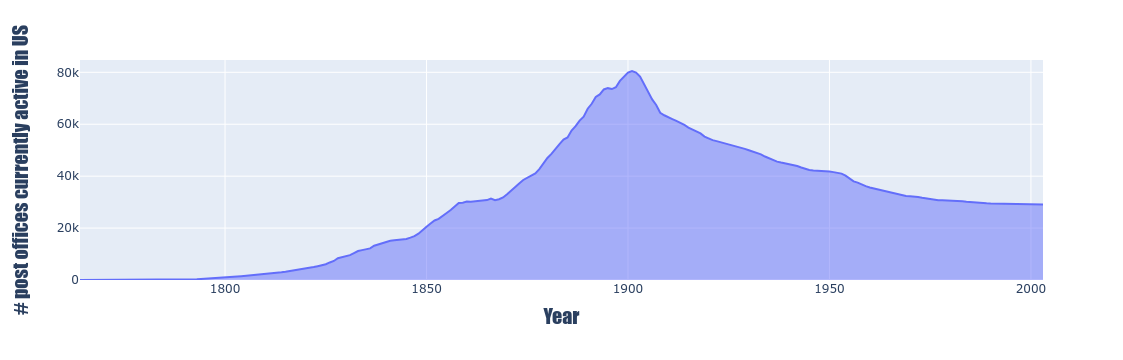

In [33]:
fig = px.area(active_posoff, x='year', y='n_post_offices')
fig.update_xaxes(title_text= "Year", title_font = dict(size=20, family="Impact"))
fig.update_yaxes(title_text="# post offices currently active in US", title_font= dict(size=20, family="Impact"))
fig.show()

### Facet wrap by state

In [34]:
# def fct_lump(df, col1, col2, col_for_n):
#         sorted_df = df[[col1, col2]]
#         sorted_df = sorted_df([col1, col2]).agg(n=(col_for_n, 'count'))
#         sorted_df = sorted_df.reset_index()
#         sorted_df = sorted_df.sort_values([col2, f'{col_for_n}'], ascending=False)
        
#         head_rows = sorted_df.groupby([col1]).sum()
#         head_rows = head_rows.sort_values()

In [35]:
# What does fct_lump do? ump together factor levels into "other"
post_offices_cumulative = post_office_years[['year', 'state']]
post_offices_cumulative = post_offices_cumulative.groupby(['year','state']).agg(n_post_offices=('year', 'count'))
post_offices_cumulative = post_offices_cumulative.reset_index()
post_offices_cumulative = post_offices_cumulative.sort_values(["state",'n_post_offices'],ascending=False)

head_rows = post_offices_cumulative.groupby(['state']).sum()
head_rows  = head_rows.sort_values('n_post_offices', ascending=False)
# to get top n rows
head_rows  = head_rows.head(16).reset_index()
# to create list
headrow_lst = head_rows['state'].tolist()
headrow_lst

['PA',
 'NY',
 'VA',
 'OH',
 'KY',
 'TX',
 'IL',
 'MO',
 'NC',
 'WV',
 'IN',
 'CA',
 'TN',
 'IA',
 'MI',
 'GA']

In [36]:
# to group all groups that are too small or under threshold into 'Other' group.
post_offices_cumulative.loc[~post_offices_cumulative['state'].isin(headrow_lst), 'state'] = 'other'
post_offices_cumulative

year  state  n_post_offices
5676  1923  other             426
5778  1925  other             423
4962  1909  other             421
5319  1916  other             421
5574  1921  other             421
...    ...    ...             ...
3351  1878  other               3
3401  1879  other               3
3451  1880  other               3
2801  1867  other               1
2851  1868  other               1

[9757 rows x 3 columns]

In [37]:
post_offices_cumulative = post_offices_cumulative.loc[post_offices_cumulative['state'] != 'other']
post_offices_cumulative

year state  n_post_offices
4757  1905    WV            2447
4808  1906    WV            2420
4859  1907    WV            2381
4706  1904    WV            2377
4655  1903    WV            2339
...    ...   ...             ...
2148  1853    CA             150
2105  1852    CA             124
2063  1851    CA              85
2021  1850    CA              23
1982  1849    CA              10

[3326 rows x 3 columns]

In [38]:
post_offices_cumulative_b = post_offices_cumulative.groupby(['state']).n_post_offices.sum()
post_offices_cumulative_b = post_offices_cumulative_b.reset_index()
post_offices_cumulative_b

state  n_post_offices
0     CA          189816
1     GA          179679
2     IA          187794
3     IL          268193
4     IN          198988
5     KY          302949
6     MI          187727
7     MO          253657
8     NC          239595
9     NY          421079
10    OH          307417
11    PA          479484
12    TN          188586
13    TX          288353
14    VA          307686
15    WV          212279

In [39]:
post_offices_cumulative_c = post_offices_cumulative.merge(post_offices_cumulative_b, left_on='state', right_on='state')
post_offices_cumulative_c = post_offices_cumulative_c.sort_values('n_post_offices_y', ascending=False)
post_offices_cumulative_c

year state  n_post_offices_x  n_post_offices_y
979   1957    PA              2208            479484
1021  1994    PA              1782            479484
1023  1996    PA              1782            479484
1024  1997    PA              1782            479484
1025  1998    PA              1782            479484
...    ...   ...               ...               ...
3157  1802    GA                27            179679
3158  1800    GA                26            179679
3159  1801    GA                26            179679
3160  1799    GA                17            179679
3087  1980    GA               637            179679

[3326 rows x 4 columns]

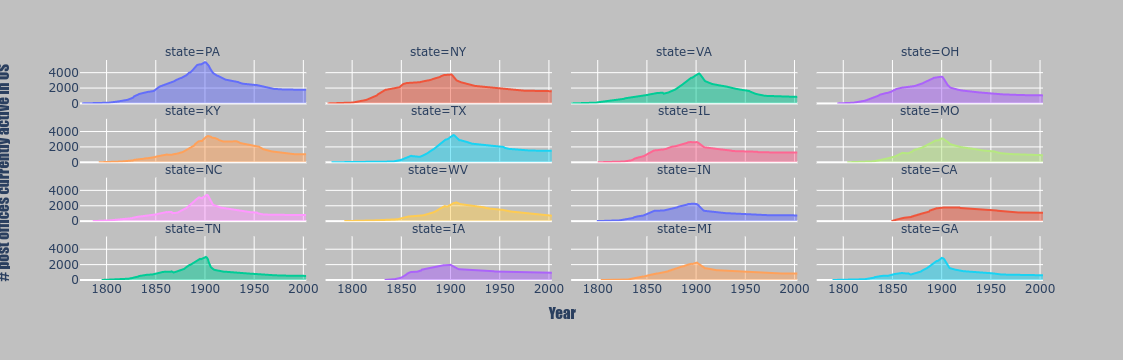

In [40]:
fig = px.area(post_offices_cumulative_c, x='year', y='n_post_offices_x', color = "state", facet_col='state', facet_col_wrap=4)

# Create Single axis caption in plotly express facet plot
fig.for_each_yaxis(lambda y: y.update(title = ''))
fig.add_annotation(x=-0.07,y=0.35,
                   text="# post offices currently active in US", 
                   font= dict(size=15, family="Impact"),textangle=-90,
                    xref="paper", yref="paper")

fig.for_each_xaxis(lambda x: x.update(title = ''))
fig.add_annotation(x=0.5,y=-0.2,
                   text="Year", 
                   showarrow=False,
                   font= dict(size=15, family="Impact"),textangle=0,
                    xref="paper", yref="paper")


fig.update_layout(
                 plot_bgcolor='rgba(0,0,0,0)',
                  paper_bgcolor='#C0C0C0',
                 showlegend=False)



fig.show()

### Post office closures per decade/year

In [41]:
post_office_closures = post_offices[~post_offices['discontinued'].isnull()]
post_office_closures = post_office_closures[(post_office_closures['discontinued'] >= 1750) & 
                                            (post_office_closures['established'] >= 1750 ) &
                                           (post_office_closures['discontinued'] <= 2021)]
post_office_closures

name state    county1  established  discontinued  \
0        A AND M COLLEGE    MS  OKTIBBEHA       1922.0        1932.0   
1               A. B. C.    TN     SUMNER       1880.0        1914.0   
2                  AARON    MO      BATES       1895.0        1933.0   
3                  AARON    TN     BENTON       1889.0        1890.0   
4                  AARON    TN    BRADLEY       1860.0        1860.0   
...                  ...   ...        ...          ...           ...   
166133            ZYBACH    TX    WHEELER       1910.0        1931.0   
166134             ZYBRA    OK   GARFIELD       1898.0        1903.0   
166135              TRUE    OK     HARMON       1901.0        1905.0   
166136              TRUE    TX      YOUNG       1894.0        1912.0   
166139  CATLETT'S  CREEK    TX       WISE       1858.0        1867.0   

        continuous  stamp_index      id  coordinates   latitude   longitude  \
0             True          1.0       2        False        NaN         NaN   
1             True          4.0       3        False        NaN         NaN   
2             True          2.0       4         True  38.422222  -94.154167   
3             True          5.0       5        False        NaN         NaN   
4             True          9.0       6        False        NaN         NaN   
...            ...          ...     ...          ...        ...         ...   
166133        True          2.0  166139         True  35.619210 -100.190700   
166134        True          5.0  166140        False        NaN         NaN   
166135        True          6.0  166141        False        NaN         NaN   
166136        True          4.0  166142         True  33.279830  -98.728670   
166139        True          7.0  166145        False        NaN         NaN   

       gnis_county gnis_state  gnis_dist  
0              NaN        NaN        NaN  
1              NaN        NaN        NaN  
2            BATES         MO        1.0  
3              NaN        NaN        NaN  
4              NaN        NaN        NaN  
...            ...        ...        ...  
166133     WHEELER         TX        1.0  
166134         NaN        NaN        NaN  
166135         NaN        NaN        NaN  
166136       YOUNG         TX        1.0  
166139         NaN        NaN        NaN  

[137017 rows x 14 columns]

In [42]:
post_office_closures = post_office_closures[['state', 'discontinued']]
# floor division %% in R  == // in python
post_office_closures['decade'] = (post_office_closures['discontinued'] // 10) * 10
post_office_closures = post_office_closures[['state', 'decade']]
post_office_closures = post_office_closures.groupby(['state', 'decade']).agg(n_closures = ('decade', 'count'))
post_office_closures = post_office_closures.reset_index()
post_office_closures['decade'] = post_office_closures['decade'].astype(int)
post_office_closures

state  decade  n_closures
0      AK    1870           1
1      AK    1880           3
2      AK    1890          13
3      AK    1900          48
4      AK    1910          51
..    ...     ...         ...
871    WY    1940          63
872    WY    1950          50
873    WY    1960          45
874    WY    1970          16
875    WY    1980           5

[876 rows x 3 columns]

In [43]:
closure_head = post_office_closures.groupby(['state']).sum()
closure_head = closure_head.sort_values('n_closures', ascending=False)
closure_head = closure_head.reset_index()
closure_head = closure_head.head(16)
closure_head = closure_head['state'].tolist()
closure_head

['PA',
 'KY',
 'TX',
 'VA',
 'NC',
 'TN',
 'MO',
 'GA',
 'AL',
 'NY',
 'OH',
 'AR',
 'WV',
 'IL',
 'MS',
 'MI']

In [44]:
# to group all groups that are too small or under threshold into 'Other' group.
post_office_closures.loc[~post_office_closures['state'].isin(closure_head), 'state'] = 'other'
post_office_closures

state  decade  n_closures
0    other    1870           1
1    other    1880           3
2    other    1890          13
3    other    1900          48
4    other    1910          51
..     ...     ...         ...
871  other    1940          63
872  other    1950          50
873  other    1960          45
874  other    1970          16
875  other    1980           5

[876 rows x 3 columns]

In [45]:
post_office_closures = post_office_closures[post_office_closures['state'] != 'other']
post_office_closures

state  decade  n_closures
12     AL    1800           1
13     AL    1810          16
14     AL    1820          90
15     AL    1830         163
16     AL    1840         137
..    ...     ...         ...
857    WV    1960         190
858    WV    1970          73
859    WV    1980         127
860    WV    1990         172
861    WV    2000           8

[321 rows x 3 columns]

In [46]:
post_office_closures_b = post_office_closures.groupby(['state']).n_closures.sum()
post_office_closures_b = post_office_closures_b.reset_index()
post_office_closures_b

state  n_closures
0     AL        4857
1     AR        4360
2     GA        5139
3     IL        4098
4     KY        6386
5     MI        3656
6     MO        5300
7     MS        3883
8     NC        5739
9     NY        4515
10    OH        4490
11    PA        6752
12    TN        5493
13    TX        6267
14    VA        6227
15    WV        4217

In [47]:
post_office_closures_c = post_office_closures.merge(post_office_closures_b, left_on='state', right_on='state')
post_office_closures_c = post_office_closures_c.sort_values('n_closures_y', ascending=False)
post_office_closures_c.head(10)

state  decade  n_closures_x  n_closures_y
240    PA    1990             1          6752
239    PA    1980            23          6752
237    PA    1960           231          6752
236    PA    1950           305          6752
235    PA    1940           153          6752
234    PA    1930           357          6752
233    PA    1920           334          6752
232    PA    1910           820          6752
231    PA    1900          2012          6752
230    PA    1890           473          6752

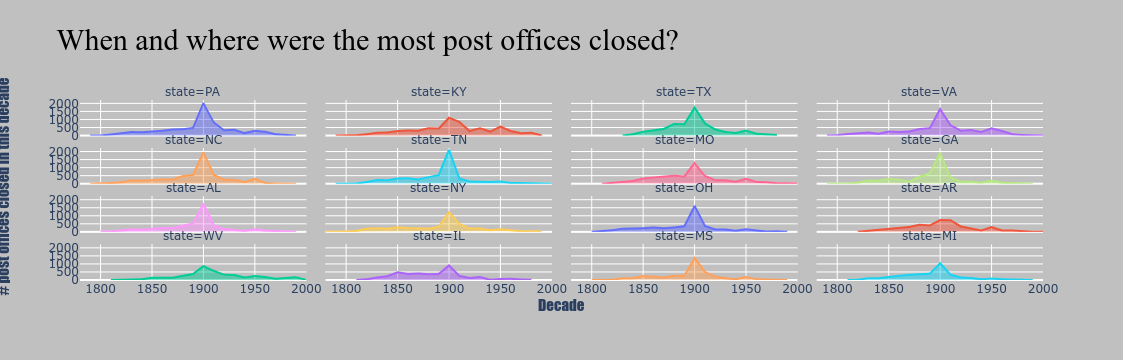

In [48]:
fig = px.area(post_office_closures_c, x='decade', y='n_closures_x', 
              color = "state", facet_col='state', facet_col_wrap=4, 
              title="When and where were the most post offices closed?")

# Create Single axis caption in plotly express facet plot
fig.for_each_yaxis(lambda y: y.update(title = ''))


fig.add_annotation(x=-0.07,y=0.35,
                   text="# post offices closed in this decade", 
                   font= dict(size=15, family="Impact"),textangle=-90,
                    xref="paper", yref="paper")

fig.for_each_xaxis(lambda x: x.update(title = ''))

fig.add_annotation(x=0.5,y=-0.2,
                   text="Decade", 
                   showarrow=False,
                   font= dict(size=15, family="Impact"),textangle=0,
                    xref="paper", yref="paper")

fig.update_layout(title_font_family="Times New Roman",
                  title_font_color="black",
                  title_font_size = 30,
                  plot_bgcolor='rgba(0,0,0,0)',
                  paper_bgcolor='#C0C0C0',
                 showlegend=False)
                  

fig.show()

### Closure rate Line graph for KY and PA 

In [49]:
cumulative_vs_closures = post_offices_cumulative
cumulative_vs_closures = cumulative_vs_closures.rename(columns={'year':'decade'})
cumulative_vs_closures.head(10)

decade state  n_post_offices
4757    1905    WV            2447
4808    1906    WV            2420
4859    1907    WV            2381
4706    1904    WV            2377
4655    1903    WV            2339
4910    1908    WV            2283
4961    1909    WV            2263
4604    1902    WV            2251
5012    1910    WV            2204
5063    1911    WV            2195

In [50]:
# merge two dataframe  on 'decade' and 'state'
cumulative_vs_closures = cumulative_vs_closures.merge(post_office_closures,on=['decade','state'], how='inner')
cumulative_vs_closures.head(10)

decade state  n_post_offices  n_closures
0    1910    WV            2204         564
1    1900    WV            2092         856
2    1920    WV            2047         336
3    1930    WV            1901         316
4    1890    WV            1698         371
5    1940    WV            1627         151
6    1950    WV            1519         251
7    1960    WV            1275         190
8    1970    WV            1087          73
9    1980    WV            1015         127

In [51]:
# create percentage of closed PO column
cumulative_vs_closures['pct_closed'] = cumulative_vs_closures['n_closures'] / cumulative_vs_closures['n_post_offices']
cumulative_vs_closures.head(10)

decade state  n_post_offices  n_closures  pct_closed
0    1910    WV            2204         564    0.255898
1    1900    WV            2092         856    0.409178
2    1920    WV            2047         336    0.164143
3    1930    WV            1901         316    0.166228
4    1890    WV            1698         371    0.218492
5    1940    WV            1627         151    0.092809
6    1950    WV            1519         251    0.165240
7    1960    WV            1275         190    0.149020
8    1970    WV            1087          73    0.067157
9    1980    WV            1015         127    0.125123

In [52]:
# filter or select rows by state and n_post_offices
cumulative_vs_closures = cumulative_vs_closures[(cumulative_vs_closures['state'].isin(['PA','KY'])) & 
                                               (cumulative_vs_closures['n_post_offices']>=50)]
cumulative_vs_closures = cumulative_vs_closures.sort_values('decade')
cumulative_vs_closures.head(10)

decade state  n_post_offices  n_closures  pct_closed
98     1800    PA              74           5    0.067568
97     1810    PA             204          61    0.299020
219    1810    KY              70          26    0.371429
218    1820    KY             157          87    0.554140
96     1820    PA             440         150    0.340909
217    1830    KY             362         171    0.472376
95     1830    PA            1037         227    0.218901
216    1840    KY             517         182    0.352031
94     1840    PA            1467         200    0.136333
215    1850    KY             727         286    0.393398

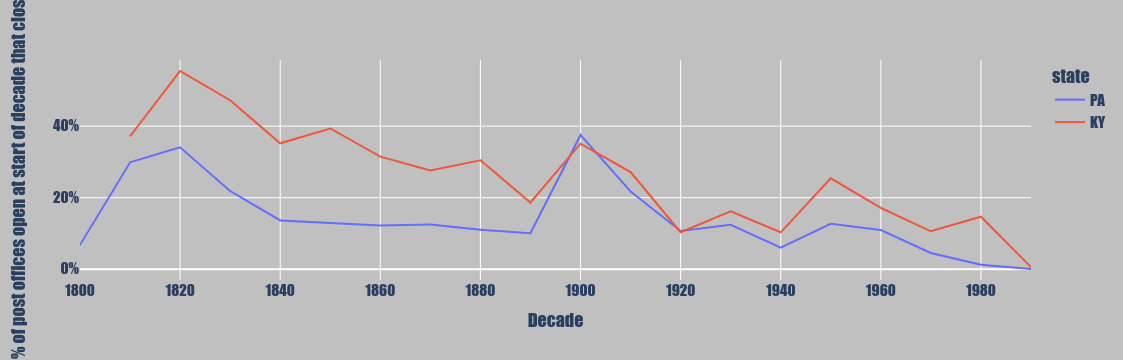

In [53]:
# create line chart using plotly express

fig = px.line(cumulative_vs_closures, x='decade', y='pct_closed',color='state')



fig.update_layout(
                    xaxis_title="Decade",
                    yaxis_title="% of post offices open at start of decade that closed",
                    font=dict(
                        family="Impact",
                        size=15),
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='#C0C0C0',
)


# formatting ticks 
fig.update_layout(
                    yaxis = dict(
                    tickmode = 'array',
                    tickvals = [0, 0.2, 0.4,],
                    ticktext = ['0%', '20%', '40%']
                        )
)



fig.show()

### Mapping number of post offices per state



In [8]:
# Note -- I cheated here :). I couldn't find equivalent of map_data in python,
# so i used Rstudio to get the states_map and state_pops(library(historydata)) data

states_map = pd.read_csv("states_map.csv")
states_map.head(10)

long        lat  group  order   region subregion state
0 -87.462006  30.389681      1      1  alabama       NaN    AL
1 -87.484932  30.372492      1      2  alabama       NaN    AL
2 -87.525032  30.372492      1      3  alabama       NaN    AL
3 -87.530762  30.332386      1      4  alabama       NaN    AL
4 -87.570869  30.326654      1      5  alabama       NaN    AL
5 -87.588058  30.326654      1      6  alabama       NaN    AL
6 -87.593788  30.309467      1      7  alabama       NaN    AL
7 -87.593788  30.286549      1      8  alabama       NaN    AL
8 -87.674004  30.275089      1      9  alabama       NaN    AL
9 -87.811516  30.257902      1     10  alabama       NaN    AL

In [9]:
state_pops = pd.read_csv("state_pops.csv")
state_pops.head(10)

GISJOIN  year state  population
0    G090  1790    CT    237655.0
1    G100  1790    DE     59096.0
2    G130  1790    GA     82548.0
3    G240  1790    MD    319728.0
4    G250  1790    MA    475199.0
5    G330  1790    NH    141899.0
6    G340  1790    NJ    184139.0
7    G360  1790    NY    340241.0
8    G370  1790    NC    395005.0
9    G420  1790    PA    433611.0

In [56]:
npost_offices = post_office_years
# select only 2003
npost_offices = npost_offices[npost_offices['year']==2003]
npost_offices.head(10)

name state  established  discontinued   latitude  longitude  year
8      AARONSBURG    PA         1792          2003  40.898967 -77.452199  2003
15       ABBVILLE    LA         1847          2003  29.982027 -92.121138  2003
18      ABBEVILLE    MS         1843          2003  34.502778 -89.501658  2003
19      ABBEVILLE    AL         1833          2003  31.571367 -85.248371  2003
20      ABBEVILLE    GA         1860          2003  31.992214 -83.308475  2003
21      ABBEVILLE    SC         1794          2003  34.178172 -82.379015  2003
25  ABBOT VILLAGE    ME         1861          2003  45.186144 -69.454101  2003
40    ABBOTTSTOWN    PA         1796          2003  39.882179 -76.996900  2003
56       ABERDEEN    MS         1836          2003  33.824974 -88.546658  2003
61       ABERNANT    AL         1902          2003  33.292112 -87.198970  2003

In [57]:
# groupby state and create number of state column
npost_offices = npost_offices.groupby('state').agg(n=('state','count'))
npost_offices = npost_offices.sort_values('n', ascending=False).reset_index()
npost_offices.head(10)

state     n
0    PA  1782
1    NY  1594
2    TX  1499
3    IL  1260
4    CA  1104
5    OH  1047
6    KY  1046
7    IA   928
8    MO   927
9    VA   851

In [58]:
# merge two datasets to get location(lat, lon) 
# npost_offices = npost_offices.merge(states_map, on='state')
# npost_offices

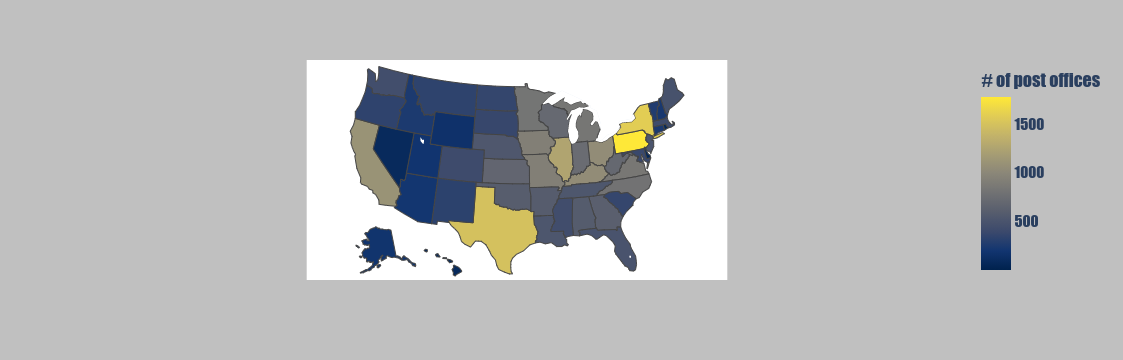

In [59]:
# Plotly has built in lat-lon and we just need to set locations= df['state'], color(fill)=df['n']
fig = px.choropleth(npost_offices,locations='state',
                    locationmode="USA-states", color="n",
                    color_continuous_scale="Cividis", scope='usa')

# update layout
fig.update_layout(
                    font=dict(
                    family="Impact",
                    size=15),
                    # change legend title
                    coloraxis_colorbar=dict(
                    title="# of post offices"),
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='#C0C0C0',
    
                )
fig.show()

In [ ]:
# df = pd.read_csv('stateabb.csv')
# df.head(5)

### Number of post offices per people

In [60]:
# (state_pops %>% filter(year == 2000), by = "state")
state_pops = state_pops[state_pops['year']==2000]
state_pops.head(10)

GISJOIN  year state  population
880    G010  2000    AL   4447100.0
881    G020  2000    AK    626932.0
882    G040  2000    AZ   5130632.0
883    G050  2000    AR   2673400.0
884    G060  2000    CA  33871648.0
885    G080  2000    CO   4301261.0
886    G090  2000    CT   3405565.0
887    G100  2000    DE    783600.0
888    G110  2000    DC    572059.0
889    G120  2000    FL  15982378.0

In [61]:
# inner join npost_offices and state_pops on 'state', assign it to post_officesper_people

post_officesper_people = npost_offices.merge(state_pops, on='state', how='inner')
post_officesper_people.head(10)

state     n GISJOIN  year  population
0    PA  1782    G420  2000  12281054.0
1    NY  1594    G360  2000  18976457.0
2    TX  1499    G480  2000  20851820.0
3    IL  1260    G170  2000  12419293.0
4    CA  1104    G060  2000  33871648.0
5    OH  1047    G390  2000  11353140.0
6    KY  1046    G210  2000   4041769.0
7    IA   928    G190  2000   2926324.0
8    MO   927    G290  2000   5595211.0
9    VA   851    G510  2000   7078515.0

In [62]:
# create post office density column | mutate(post_office_density = n / (population / 1e6))

post_officesper_people['post_office_density'] = post_officesper_people['n'] / (post_officesper_people['population']/1e6)
post_officesper_people.head(10)

state     n GISJOIN  year  population  post_office_density
0    PA  1782    G420  2000  12281054.0           145.101552
1    NY  1594    G360  2000  18976457.0            83.998820
2    TX  1499    G480  2000  20851820.0            71.888209
3    IL  1260    G170  2000  12419293.0           101.455051
4    CA  1104    G060  2000  33871648.0            32.593631
5    OH  1047    G390  2000  11353140.0            92.221183
6    KY  1046    G210  2000   4041769.0           258.797571
7    IA   928    G190  2000   2926324.0           317.121412
8    MO   927    G290  2000   5595211.0           165.677398
9    VA   851    G510  2000   7078515.0           120.222956

In [63]:
# inner_join(states_map, by = "state") | david used this part to get location | plotly has built in location | we just need to set locations = state
# post_officesper_people = post_officesper_people.merge(states_map, on='state', how='inner')
# post_officesper_people.head(10)

In [64]:
# select only two columns of pop to make the plot faster

post_officesper_people = post_officesper_people[['state', 'post_office_density']]
post_officesper_people.head(10)

state  post_office_density
0    PA           145.101552
1    NY            83.998820
2    TX            71.888209
3    IL           101.455051
4    CA            32.593631
5    OH            92.221183
6    KY           258.797571
7    IA           317.121412
8    MO           165.677398
9    VA           120.222956

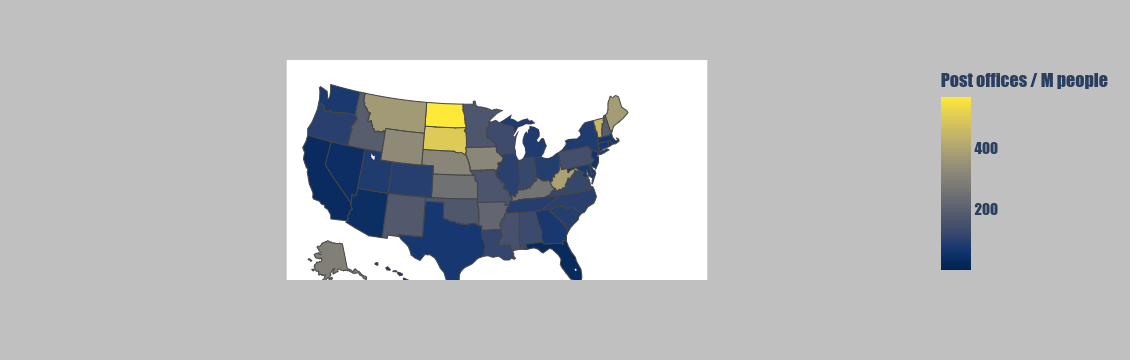

In [65]:
# create choropleth using plotly express

fig  = px.choropleth(post_officesper_people,locations='state',
                    locationmode="USA-states", color="post_office_density",
                    color_continuous_scale="Cividis", scope='usa')


        # update layout
fig.update_layout(

            font=dict(
                family="Impact",
                size=15),
            # change legend title
            coloraxis_colorbar=dict(
                title="Post offices / M people"),
            plot_bgcolor='rgba(0,0,0,0)',
            paper_bgcolor='#C0C0C0',

        )

fig.show()

### Number of post offices over time

In [10]:
post_office_cumulative_all = post_office_years
post_office_cumulative_all = post_office_cumulative_all.groupby(['year','state']).agg(n_post_offices=('year','count'))
post_office_cumulative_all = post_office_cumulative_all.sort_values('n_post_offices', ascending=False).reset_index()
post_office_cumulative_all
                                                                                      

year state  n_post_offices
0     1900    PA            5363
1     1901    PA            5327
2     1899    PA            5314
3     1898    PA            5247
4     1902    PA            5200
...    ...   ...             ...
9752  1830    MN               1
9753  1988    DC               1
9754  1862    MT               1
9755  1800    MS               1
9756  1764    ME               1

[9757 rows x 3 columns]

In [11]:
# merger state_pop and poc_all, assign it to by state year 
by_state_year = post_office_cumulative_all.merge(state_pops, on=['year', 'state'] )
by_state_year

year state  n_post_offices GISJOIN  population
0    1900    PA            5363    G420   6302115.0
1    1890    PA            4714    G420   5258014.0
2    1900    NY            3796    G360   7268894.0
3    1910    PA            3772    G420   7665111.0
4    1900    VA            3705    G510   1854184.0
..    ...   ...             ...     ...         ...
926  1790    GA               1    G130     82548.0
927  1790    DE               1    G100     59096.0
928  1970    DC               1    G110    756510.0
929  1990    DC               1    G110    606900.0
930  1980    DC               1    G110    638333.0

[931 rows x 5 columns]

In [12]:
# create post_office_density column | mutate(post_office_density = n_post_offices / (population / 1e6))
by_state_year['post_office_density'] = by_state_year['n_post_offices'] / (by_state_year['population'] / 1e6)
by_state_year

year state  n_post_offices GISJOIN  population  post_office_density
0    1900    PA            5363    G420   6302115.0           850.984154
1    1890    PA            4714    G420   5258014.0           896.536221
2    1900    NY            3796    G360   7268894.0           522.225252
3    1910    PA            3772    G420   7665111.0           492.099853
4    1900    VA            3705    G510   1854184.0          1998.183568
..    ...   ...             ...     ...         ...                  ...
926  1790    GA               1    G130     82548.0            12.114164
927  1790    DE               1    G100     59096.0            16.921619
928  1970    DC               1    G110    756510.0             1.321860
929  1990    DC               1    G110    606900.0             1.647718
930  1980    DC               1    G110    638333.0             1.566580

[931 rows x 6 columns]

In [13]:
# filter years
by_state_year = by_state_year[by_state_year['year'].isin([1800, 1850, 1900, 1950])]
by_state_year = by_state_year.sort_values('n_post_offices', ascending=False)
#by_state_year = by_state_year[['state', 'n_post_offices']]
by_state_year

year state  n_post_offices GISJOIN  population  post_office_density
0    1900    PA            5363    G420   6302115.0           850.984154
2    1900    NY            3796    G360   7268894.0           522.225252
4    1900    VA            3705    G510   1854184.0          1998.183568
7    1900    OH            3479    G390   4157545.0           836.791905
8    1900    TX            3287    G480   3048710.0          1078.160927
..    ...   ...             ...     ...         ...                  ...
902  1800    DC               3    G285      8850.0           338.983051
903  1800    DC               3    G385     45365.0            66.130277
917  1950    DC               1    G025    128643.0             7.773451
918  1950    DC               1    G110    802178.0             1.246606
919  1950    DC               1    G155    499794.0             2.000824

[160 rows x 6 columns]

In [14]:
# join with states_map | we dont need this part | plotly choropleth has build in lat,lon
# by_state_year = by_state_year.merge(states_map , on='state')
# by_state_year

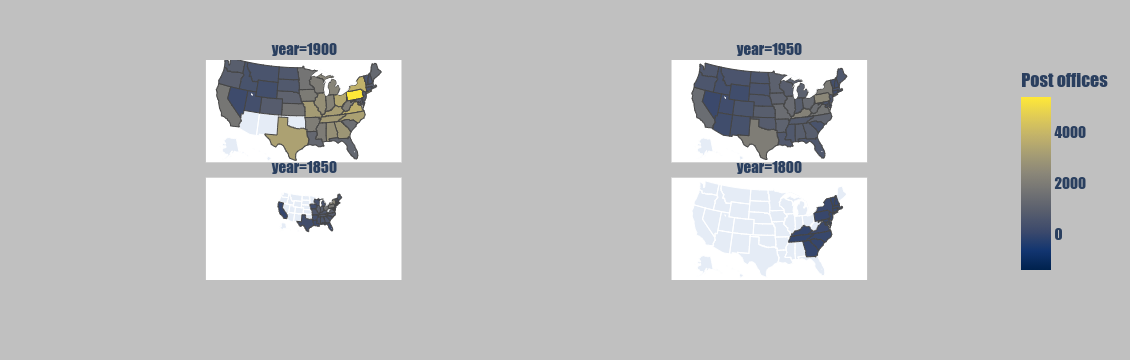

In [101]:
# create choropleth using plotly express

fig = px.choropleth(by_state_year, locations=by_state_year['state'],
                    locationmode="USA-states", color = by_state_year['n_post_offices'],
                    color_continuous_midpoint=2000,
                    color_continuous_scale=px.colors.sequential.Cividis, 
                    facet_col='year', facet_col_wrap=2,
                    
                    scope='usa')

# update layout
fig.update_layout(

            font=dict(
                family="Impact",
                size=15),
            # change legend title
            coloraxis_colorbar=dict(
                title="Post offices"),
            plot_bgcolor='rgba(0,0,0,0)',
            paper_bgcolor='#C0C0C0',

        )

fig.show()


### Number of Post Offices over time (annimation)


In [14]:
post_office_cumulative_all = post_office_years
post_office_cumulative_all = post_office_cumulative_all.groupby(['year','state']).agg(n_post_offices=('year','count'))
post_office_cumulative_all = post_office_cumulative_all.sort_values('n_post_offices', ascending=False).reset_index()
post_office_cumulative_all.head(10)
                                        

year state  n_post_offices
0  1900    PA            5363
1  1901    PA            5327
2  1899    PA            5314
3  1898    PA            5247
4  1902    PA            5200
5  1897    PA            5143
6  1895    PA            5089
7  1894    PA            5083
8  1903    PA            5073
9  1896    PA            5064

In [31]:
# merger states_map and poc_all, assign it to by state year
by_state_year = post_office_cumulative_all.merge(states_map, on='state', how='inner')
by_state_year = post_office_cumulative_all.sort_values(['year'], ascending=True)
by_state_year

year state  n_post_offices
9756  1764    ME               1
9573  1765    ME               1
9607  1766    ME               1
9606  1767    ME               1
9605  1768    ME               1
...    ...   ...             ...
2346  2003    OH            1047
5878  2003    MD             389
7162  2003    UT             191
1183  2003    NY            1594
9626  2003    DC               1

[9757 rows x 3 columns]

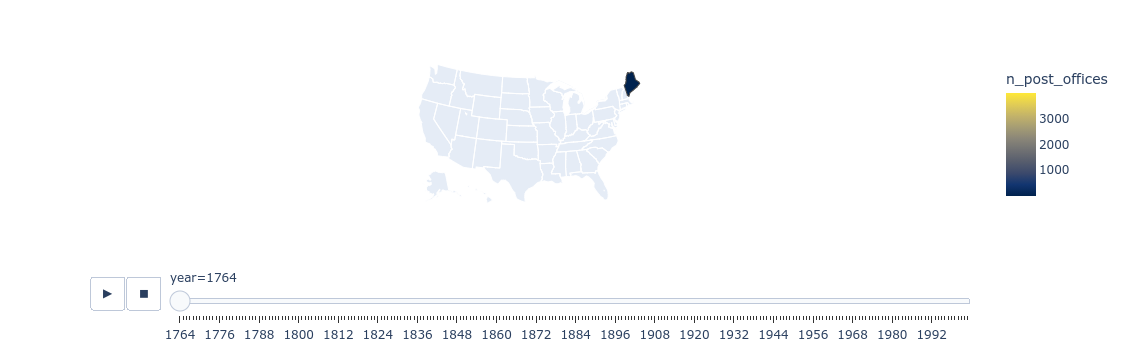

In [32]:
fig = px.choropleth(by_state_year, locations=by_state_year['state'],
                    locationmode="USA-states", color = by_state_year['n_post_offices'],
                    animation_frame='year',
                    color_continuous_midpoint=2000,
                    color_continuous_scale=px.colors.sequential.Cividis, 
                    
                    scope='usa')
fig.update_layout(transition = {'duration': 10})
fig.show()

#### Animating individual post office openings

In [15]:
post_office_years_scattergeo = post_office_years[post_office_years['year']==1900]
post_office_years_scattergeo = post_office_years_scattergeo.dropna()
post_office_years_scattergeo = post_office_years_scattergeo[~(post_office_years_scattergeo['state']=='HI') | (post_office_years_scattergeo['state']=='AK')]
post_office_years_scattergeo

name state  established  discontinued   latitude   longitude  \
2               AARON    MO         1895          1933  38.422222  -94.154167   
8          AARONSBURG    PA         1792          2003  40.898967  -77.452199   
11             ABADYL    MO         1895          1919  37.038386  -92.947119   
13            ABATTIS    MO         1878          1904  38.816667  -91.391667   
15           ABBVILLE    LA         1847          2003  29.982027  -92.121138   
...               ...   ...          ...           ...        ...         ...   
166125           ZUNI    NM         1879          2003  35.070490 -108.845600   
166127         ZURICH    KS         1880          2003  39.234450  -99.438160   
166131           ZYBA    KS         1887          1906  37.434740  -97.389210   
166136           TRUE    TX         1894          1912  33.279830  -98.728670   
166137  SIERRA BLANCA    TX         1882          2003  31.175930 -105.360000   

        year  
2       1900  
8       1900  
11      1900  
13      1900  
15      1900  
...      ...  
166125  1900  
166127  1900  
166131  1900  
166136  1900  
166137  1900  

[66746 rows x 7 columns]

In [11]:
fig = px.scatter_geo(post_office_years_scattergeo,
                    lat=post_office_years_scattergeo['latitude'],
                    lon=post_office_years_scattergeo['longitude'],
                    hover_name="name",
                    
                  )
# update the size of marker and change color 
fig.update_traces(marker=dict(size=1, color ='#004B87',)
                 )
# select only Usa
fig.update_layout(
        title="Post Offices",
        geo_scope='usa',
    )

fig.show()

In [8]:
# filter(year %% 4 == 0)
post_office_years_scattergeo_anim = post_office_years[post_office_years['year'] % 4 == 0]

# filter(!state %in% c("HI", "AK"))
post_office_years_scattergeo_anim = post_office_years_scattergeo_anim[~(post_office_years_scattergeo_anim['state']=='HI')
                                                                      | (post_office_years_scattergeo_anim['state']=='AK')]
post_office_years_scattergeo_anim = post_office_years_scattergeo_anim.dropna()
post_office_years_scattergeo_anim = post_office_years_scattergeo_anim.sort_values('year', ascending=True)
post_office_years_scattergeo_anim

name state  established  discontinued   latitude   longitude  \
19507        FALMOUTH    ME         1764          1786  43.658933  -70.266500   
19507        FALMOUTH    ME         1764          1786  43.658933  -70.266500   
41707         NORWICH    CT         1772          1836  41.524491  -72.071339   
19507        FALMOUTH    ME         1764          1786  43.658933  -70.266500   
17954   ELIZABETHTOWN    NJ         1776          1855  40.663992  -74.210701   
...               ...   ...          ...           ...        ...         ...   
21237         FREEDOM    NY         1826          2003  42.496997  -78.385350   
35413     MARKED TREE    AR         1888          2003  35.529908  -90.418279   
163040       VAN HORN    TX         1886          2003  31.038830 -104.837600   
147928           MAUD    TX         1881          2003  33.327310  -94.345430   
166137  SIERRA BLANCA    TX         1882          2003  31.175930 -105.360000   

        year  
19507   1764  
19507   1768  
41707   1772  
19507   1772  
17954   1776  
...      ...  
21237   2000  
35413   2000  
163040  2000  
147928  2000  
166137  2000  

[1605650 rows x 7 columns]

In [ ]:
fig = px.scatter_geo(post_office_years_scattergeo_anim,
                    lat=post_office_years_scattergeo_anim['latitude'],
                    lon=post_office_years_scattergeo_anim['longitude'],
                    hover_name = 'name',
                    animation_frame='year'
                     )

# update the size of marker and change color 
fig.update_traces(marker=dict(size=1, color ='#004B87',)
                 )

# select only Usa
fig.update_layout(
        title="Post Offices",
        geo_scope='usa')
    

fig.show()

[Plotly facet plot](https://stackoverflow.com/questions/58167028/single-axis-caption-in-plotly-express-facet-plot)

[Formatting ticks in Plotly](https://plotly.com/python/tick-formatting/)

[Choropleth Maps in Python - Plotly](https://plotly.com/python/choropleth-maps/)